In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#importing the data
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


replacing 0's with NaN as it is better to not to count them in our calculation

In [4]:
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0,np.NaN)

In [5]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

seeing the distribution of these columns before imputing

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

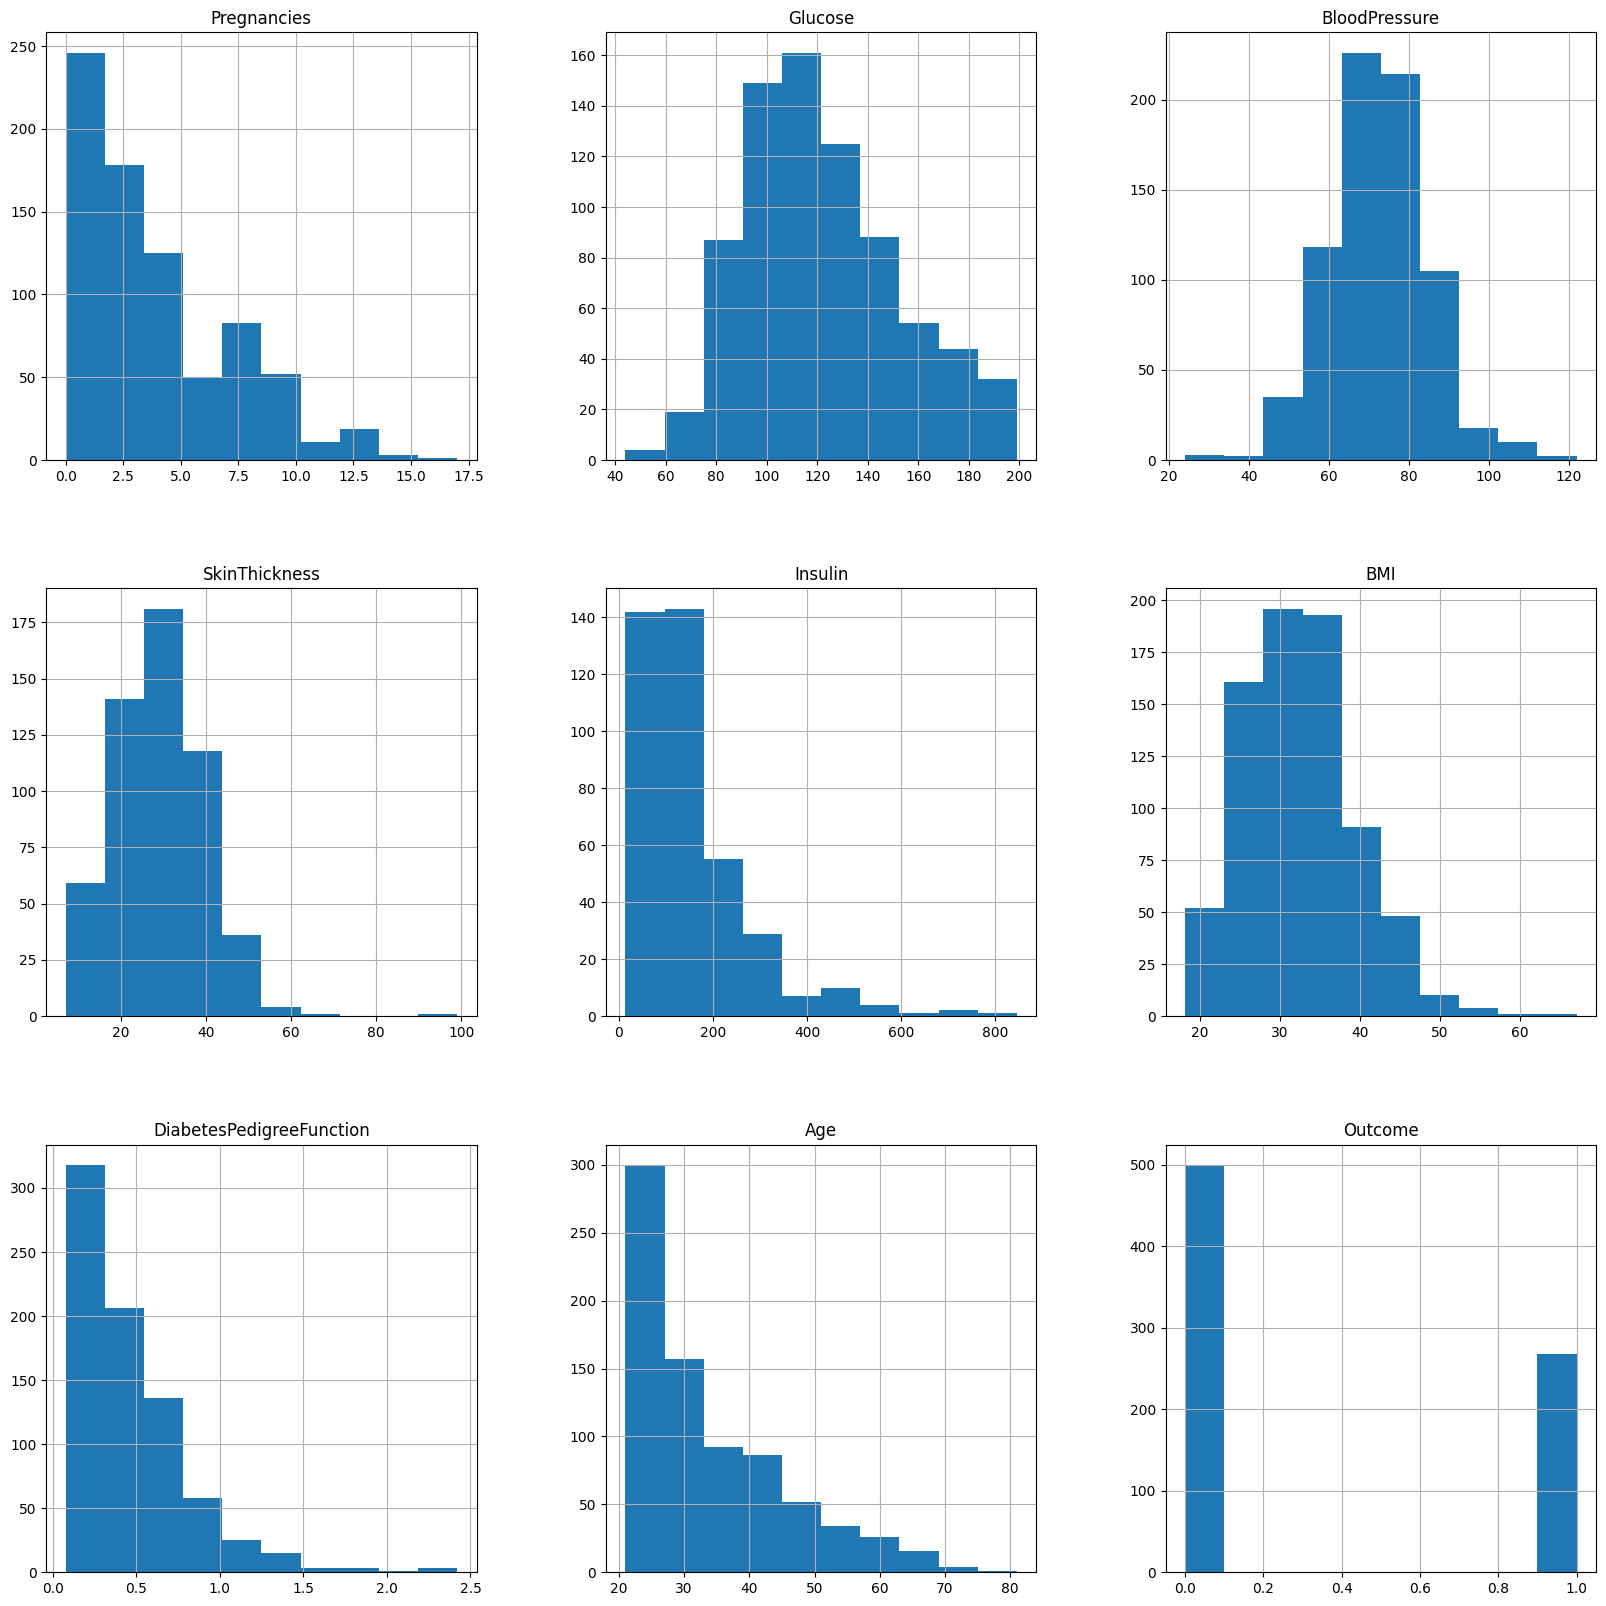

In [6]:
df.hist(figsize = (20,20))

In [7]:
#using sklearn's Simple Imputer for imputing the columns
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

mean_cols= ["Glucose", "BloodPressure"]#columns that need mean imputation
median_cols= ["SkinThickness", "Insulin", "BMI"]#columns that need median imputation

#imputing process
df[mean_cols] = imp_mean.fit_transform(df[mean_cols])
df[median_cols] = imp_median.fit_transform(df[median_cols])


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

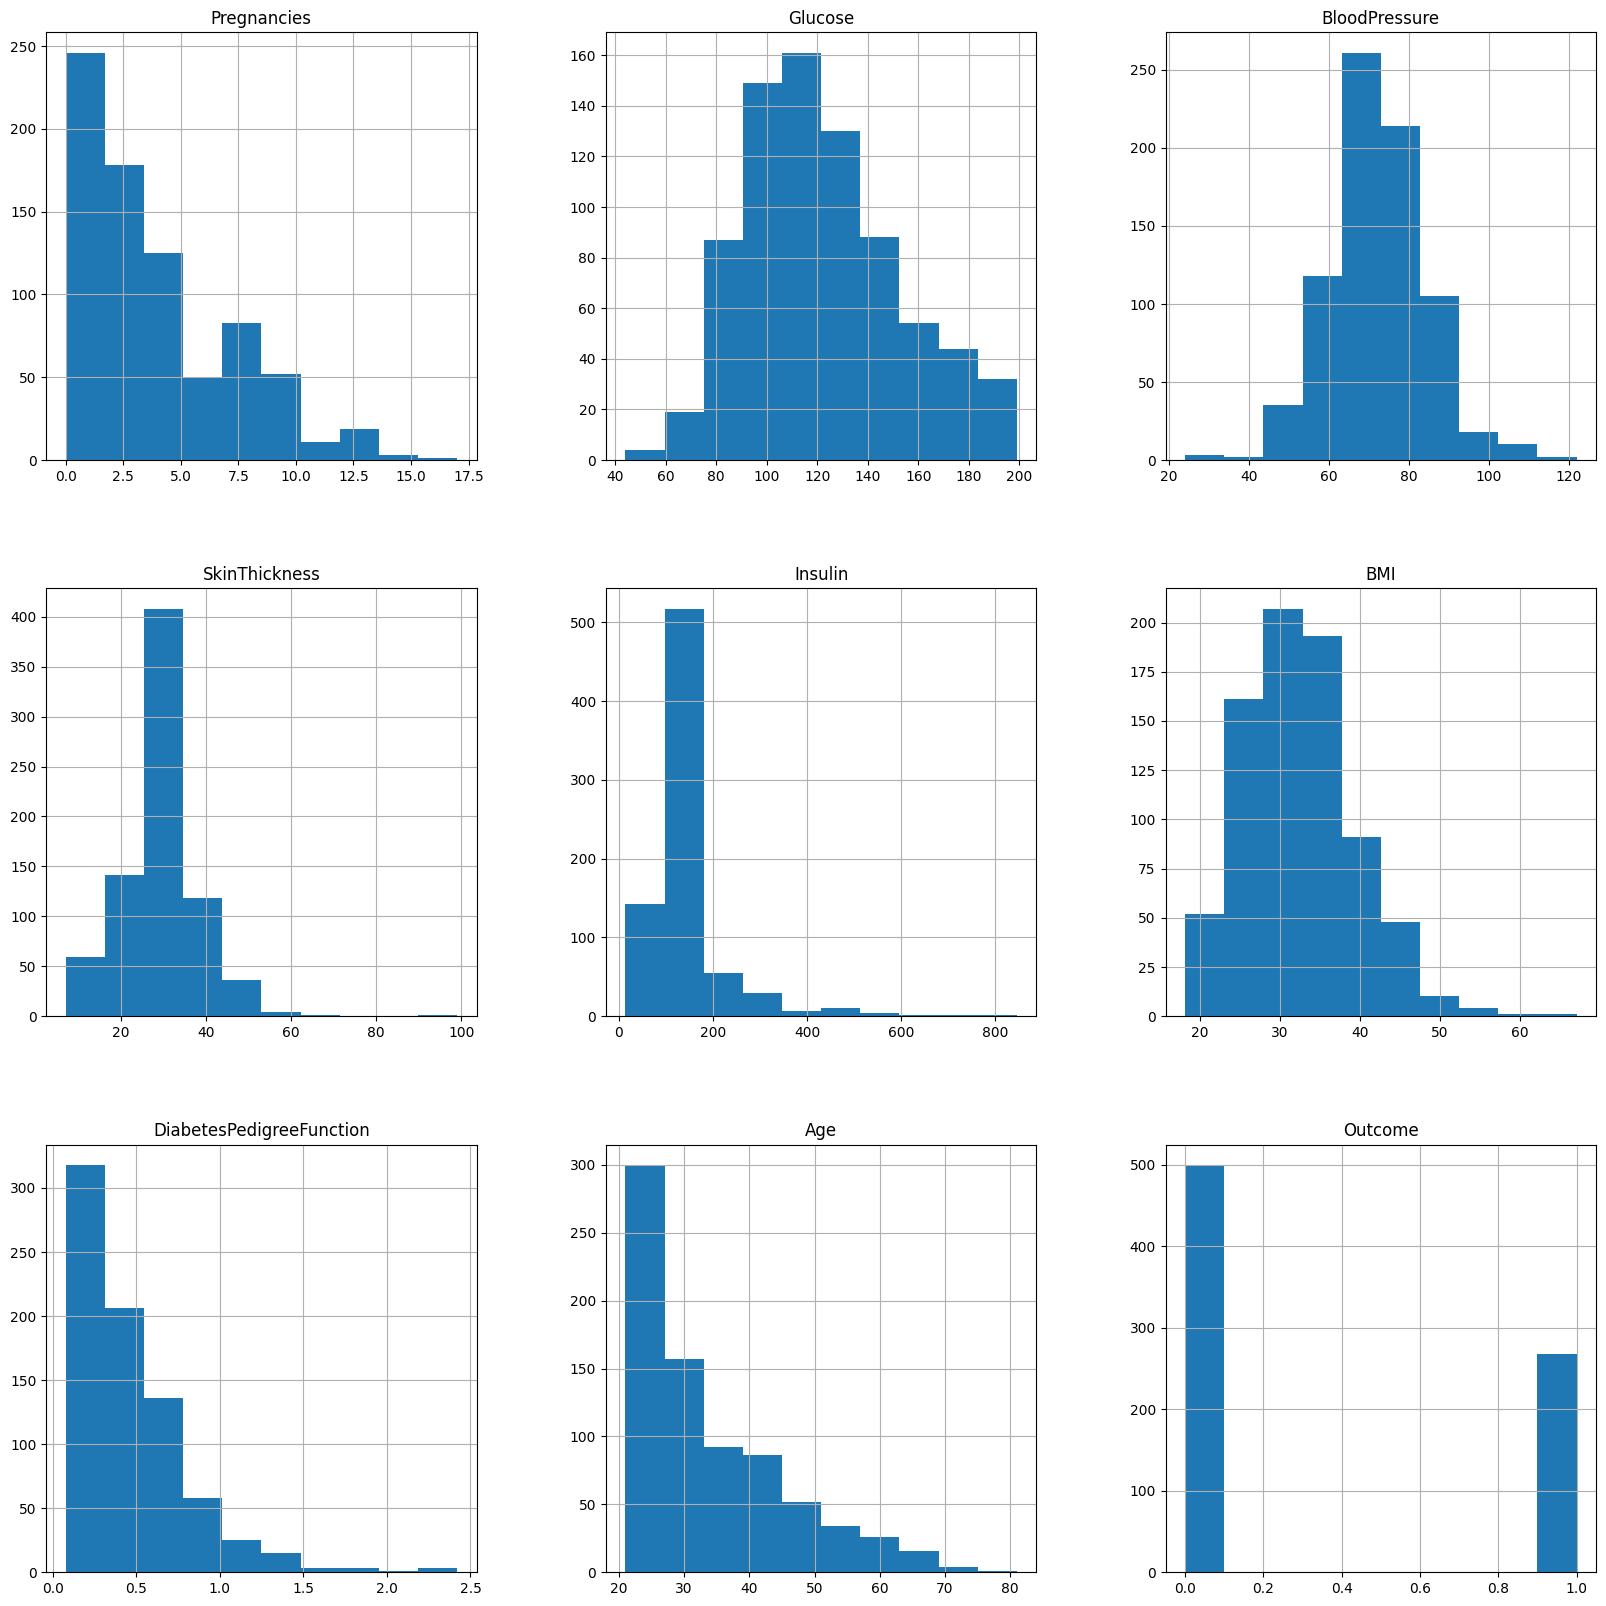

In [8]:
df.hist(figsize = (20,20)) #seeing the new distribution after imputation

<Axes: >

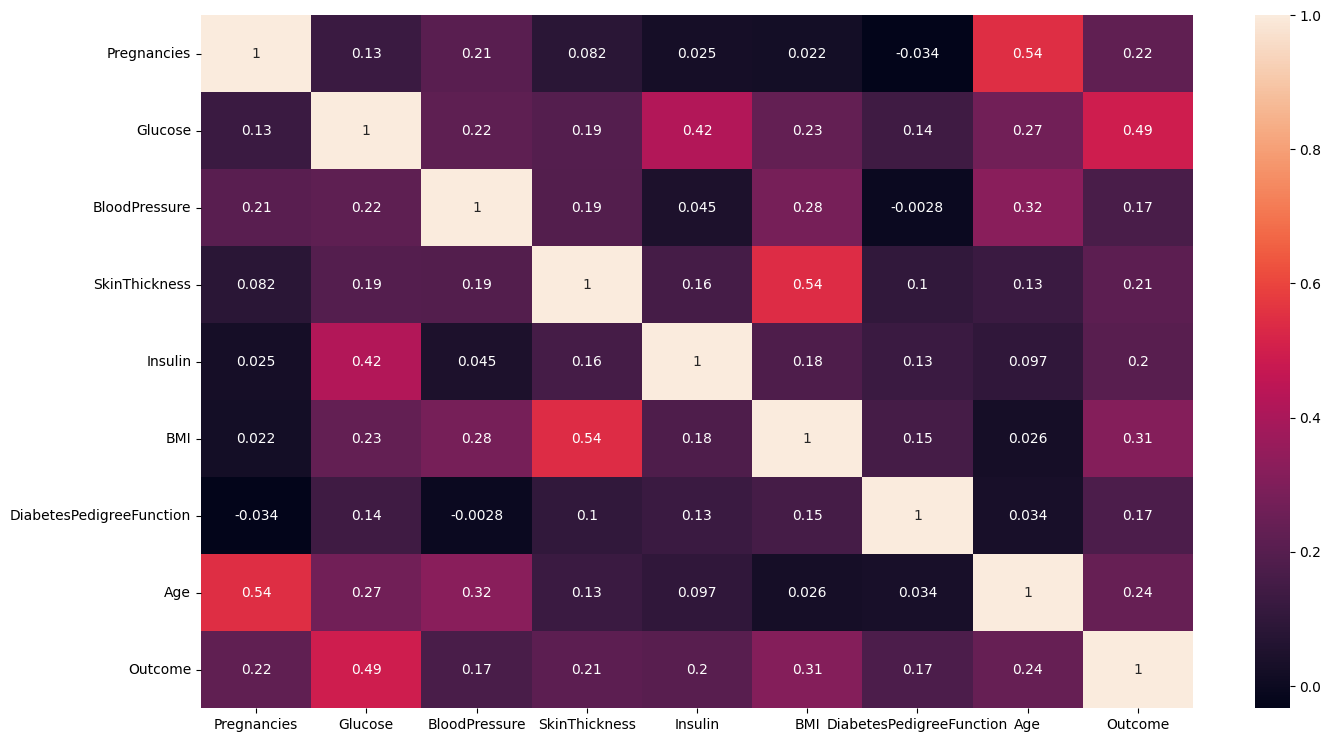

In [9]:
#making a heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)

In [10]:
X=df.drop(columns=["Outcome"])#features
y=df["Outcome"]#target

In [11]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
#using KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []

for i in range(1,30):

  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  
  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

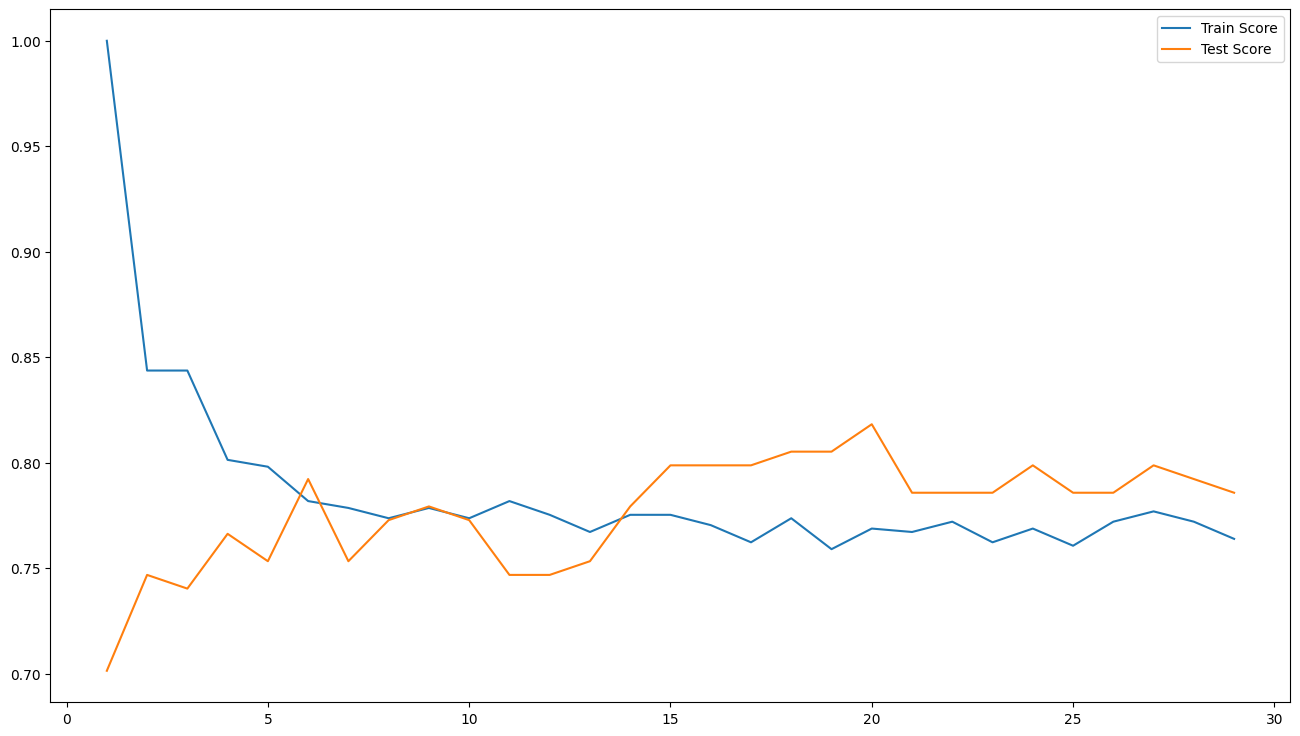

In [13]:
plt.figure(figsize=(16, 9))
plot = sns.lineplot(x=range(1, 30), y=train_scores, label='Train Score')
plot = sns.lineplot(x= range(1, 30),y=test_scores,  label='Test Score')
plt.show()

In [14]:
knn = KNeighborsClassifier(16) #using 16 neighbours

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7987012987012987

In [15]:
#checking the r2 values
from sklearn.metrics import r2_score

# R2 score of train set
y_pred_train = knn.predict(X_train)
R2_train_model = r2_score(y_train,y_pred_train)

# R2 score of test set
y_pred_test = knn.predict(X_test)
R2_test_model = r2_score(y_test,y_pred_test)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [17]:
#import GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
# knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


In [18]:
#exporting the model
pickle.dump(knn, open("KNN_Classifier.pkl", "wb"))

In [19]:
knn.predict(X_test)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
X_test.iloc[0]

Pregnancies                   7.000
Glucose                     136.000
BloodPressure                74.000
SkinThickness                26.000
Insulin                     135.000
BMI                          26.000
DiabetesPedigreeFunction      0.647
Age                          51.000
Name: 285, dtype: float64

In [21]:
X_test.iloc[1]

Pregnancies                   1.000
Glucose                     151.000
BloodPressure                60.000
SkinThickness                29.000
Insulin                     125.000
BMI                          26.100
DiabetesPedigreeFunction      0.179
Age                          22.000
Name: 101, dtype: float64

In [22]:
X_test.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object